In [ ]:
import sys
sys.path.append('../')

In [ ]:
import pandas as pd
import numpy as np
from src.data_preprocessing import TextPreprocessor, load_and_prepare_data
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
df = load_and_prepare_data('../data/raw/Fake.csv', '../data/raw/True.csv')

In [ ]:
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(df.head())


Dataset shape: (44898, 6)
Columns: ['title', 'text', 'subject', 'date', 'label', 'combined_text']
                                               title  \
0  Ben Stein Calls Out 9th Circuit Court: Committ...   
1  Trump drops Steve Bannon from National Securit...   
2  Puerto Rico expects U.S. to lift Jones Act shi...   
3   OOPS: Trump Just Accidentally Confirmed He Le...   
4  Donald Trump heads for Scotland to reopen a go...   

                                                text       subject  \
0  21st Century Wire says Ben Stein, reputable pr...       US_News   
1  WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews   
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...  politicsNews   
3  On Monday, Donald Trump once again embarrassed...          News   
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...  politicsNews   

                  date  label  \
0    February 13, 2017      0   
1       April 5, 2017       1   
2  September 27, 2017       1   
3         Ma

In [ ]:
preprocessor = TextPreprocessor()

In [ ]:
import nltk

nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to C:\Users\PIYUSH
[nltk_data]     PATRIKAR\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to C:\Users\PIYUSH
[nltk_data]     PATRIKAR\AppData\Roaming\nltk_data...


True

In [ ]:
print("\nPreprocessing text... This might take a few minutes...")
df['cleaned_text'] = df['combined_text'].apply(lambda x: preprocessor.preprocess(x))



Preprocessing text... This might take a few minutes...


In [ ]:
print("\nSample before preprocessing:")
print(df['combined_text'].iloc[0][:300])
print("\nSample after preprocessing:")
print(df['cleaned_text'].iloc[0][:300])


Sample before preprocessing:
Ben Stein Calls Out 9th Circuit Court: Committed a ‘Coup d’état’ Against the Constitution 21st Century Wire says Ben Stein, reputable professor from, Pepperdine University (also of some Hollywood fame appearing in TV shows and films such as Ferris Bueller s Day Off) made some provocative statements 

Sample after preprocessing:
ben stein call th circuit court committed ‘ coup ’ état ’ constitution st century wire say ben stein reputable professor pepperdine university also hollywood fame appearing tv show film ferris bueller day made provocative statement judge jeanine pirro show recently discussing halt imposed president 


In [ ]:
df['cleaned_length'] = df['cleaned_text'].apply(len)
print("\nCleaned text length statistics:")
print(df['cleaned_length'].describe())


Cleaned text length statistics:
count    44898.000000
mean      1760.042162
std       1511.542378
min          0.000000
25%        910.000000
50%       1547.000000
75%       2175.000000
max      37928.000000
Name: cleaned_length, dtype: float64


In [ ]:
print(f"\nArticles with less than 50 characters: {(df['cleaned_length'] < 50).sum()}")
df = df[df['cleaned_length'] >= 50].reset_index(drop=True)
print(f"Dataset shape after filtering: {df.shape}")


Articles with less than 50 characters: 75
Dataset shape after filtering: (44823, 8)


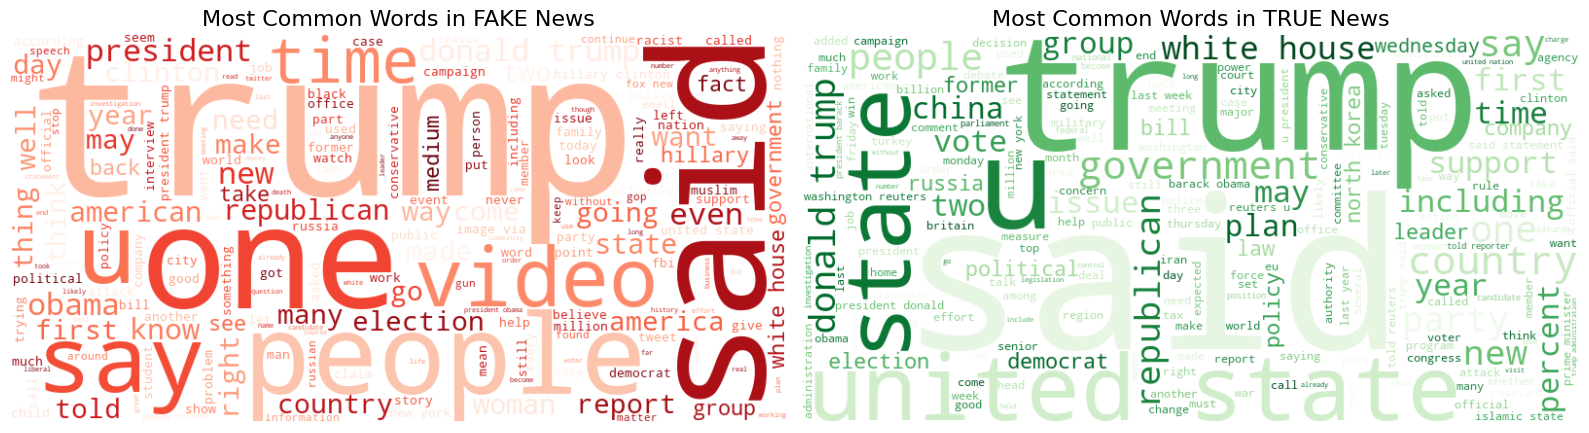

In [ ]:
fake_text = ' '.join(df[df['label']==0]['cleaned_text'].head(1000))
true_text = ' '.join(df[df['label']==1]['cleaned_text'].head(1000))

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

wordcloud_fake = WordCloud(width=800, height=400, 
                           background_color='white',
                           colormap='Reds').generate(fake_text)
axes[0].imshow(wordcloud_fake, interpolation='bilinear')
axes[0].set_title('Most Common Words in FAKE News', fontsize=16)
axes[0].axis('off')

wordcloud_true = WordCloud(width=800, height=400, 
                           background_color='white',
                           colormap='Greens').generate(true_text)
axes[1].imshow(wordcloud_true, interpolation='bilinear')
axes[1].set_title('Most Common Words in TRUE News', fontsize=16)
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
processed_df = df[['title', 'text', 'subject', 'combined_text', 'cleaned_text', 'label']].copy()

In [ ]:
processed_df.to_csv('../data/processed/processed_data.csv', index=False)
print(f"\nProcessed data saved! Shape: {processed_df.shape}")


Processed data saved! Shape: (44823, 6)


In [ ]:
sample_df = processed_df.sample(n=5000, random_state=42)
sample_df.to_csv('../data/processed/sample_data.csv', index=False)
print(f"Sample data saved! Shape: {sample_df.shape}")

Sample data saved! Shape: (5000, 6)
